# Lab 1 - Module 1: Understanding Global Error

**Learning Objectives:**
- Understand what "global error" or "loss" means
- See how error is measured across all data points
- Visualize the relationship between data and predictions

**Time:** ~5 minutes

---

**IMPORTANT:** Enter the same group code you used in Module 0!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enter your group code
group_code = int(input("Enter your group code: "))
np.random.seed(group_code)

# Generate data (same as Module 0)
true_m = np.random.uniform(-3, 3)
true_b = np.random.uniform(-5, 5)
x = np.linspace(-5, 5, 25)
noise = np.random.normal(0, 1.0, size=len(x))
y = true_m * x + true_b + noise

def sse(y_true, y_pred):
    """Sum of squared errors (global loss)."""
    return np.sum((y_true - y_pred)**2)

print("✓ Data generated for your group")

ValueError: invalid literal for int() with base 10: ''

## What Do We Mean by a *Model*?

In this course, the word **model** has a very specific meaning.

A **model** is a rule, formula, or pattern that **makes predictions** based on input values.  A model isn't "reality,", but it attempts to closely capture how a set of data behaves.

### Examples of simple models:

- A straight line:  
  `prediction = m * x + b`
- A rule like “every hour the temperature drops by 2 degrees.”
- A computer program that takes an image and predicts what object is in it.

A model has **parameters** — numbers that control how it behaves.

- For a line, the parameters are the **slope** `m` and **intercept** `b`.
- In more complicated models (like neural networks), there can be millions of parameters.

### What models do

A model:

1. **Takes input**  
   (for example, a value of `x`)

2. **Produces a prediction**  
   (for example, a predicted value of `y`)

3. **Can be adjusted**  
   by changing its parameters

### Why we adjust models

If a model’s predictions do not match the data very well, we adjust the parameters to make it better.

But the model does *not* know whether its guesses look “right.”  
It only receives one piece of information: **the total error** (loss) based on the differences between prediction and data.

This is why we spend so much time defining error and loss — these numbers tell the model how to improve.

### In short:

A **model** is a system that:

- makes predictions,
- depends on adjustable parameters, and
- is improved by reducing its total error on data.

This idea is the foundation of both simple curve fitting **and** modern AI systems.


## Understanding Error and Total Error (Loss)

Before we start fitting models, we need a clear idea of **what “error” means**.

### **1.1 Error at a Single Data Point**

Suppose we have:

- a true value from data: `actual`,  
- a predicted value from our model: `predicted`.

The **error** at that point is simply the difference:


Positive error means the model predicted too *low*.  
Negative error means the model predicted too *high*.

### **1.2 Why We Don’t Just Add These Errors**

If we add all the raw errors for a dataset, something bad happens:

- some errors are positive,
- some are negative,
- and they can cancel each other out even if the model is doing a terrible job.

Example:  
If one point is off by +5 and another is off by –5, the total would look like “0”,  
even though both points are badly wrong.

We don’t want cancellations — we want a measure of **how wrong** the model is overall.

### **1.3 Squaring Errors to Make Them All Positive**

To fix this, we **square** each individual error:

squared_error = (actual – predicted)^2


This has three important effects:

- All errors become **positive**, so nothing cancels out.
- Larger mistakes become **much more noticeable** (a big miss matters more than a small one).
- The math works out nicely later when we do optimization.

### **1.4 Total Error (also called Loss)**

To measure how well a model fits *all* the data points, we combine the squared errors:
total_error = squared_error_1 + squared_error_2 + squared_error_3 + ...


This is often called the **loss**.

A **good** model has a **small** total error.  
A **bad** model has a **large** total error.

### **1.5 Why We Use Total Error in Optimization**

When we’re adjusting model parameters (like slope and intercept), the only thing the computer “looks at” is the **total error**. It doesn’t see the data points or the line shape the way a person does.

The optimizer tries different values, checks the total error, and tries to reduce that number.  

This is why understanding *how* we compute error is essential — it becomes the entire “signal” that guides learning.



## 2. Error and Loss – Global Error with Visible Line

First, we’ll **show** you the true line and compute its global error (loss) for your noisy data.

- Each point has some **error**: the vertical distance between the point and the line.
- The **global error** (or **loss**) is the sum of the squared errors across all points.

Run the next cell and look at:

- The scatter of data points.
- The true line.
- The printed **Sum of Squared Errors (SSE)**.

👉 On your handout, answer:

**Q1.** In your own words, what does “global error” or “loss” measure in this plot?  
**Q2.** If we changed the slope or intercept of the line, how would that change the loss?


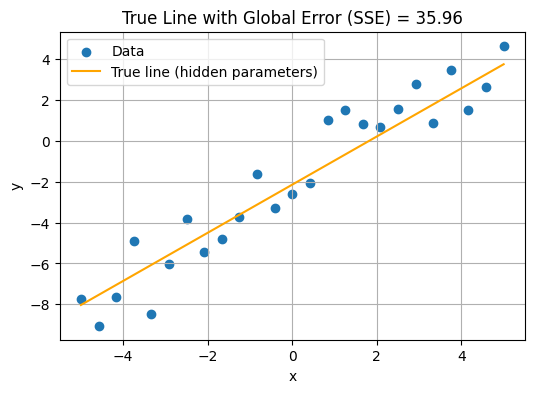

True line parameters (hidden from students for now): m = 1.179, b = -2.139
Global error (SSE) = 35.96
Instructor note: You may want to hide this output when using in class.


In [31]:
# Plot the data and the true line, and compute the global error.

y_true_line = true_m * x + true_b
total_loss = sse(y, y_true_line)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.plot(x, y_true_line, label=f'True line (hidden parameters)', color='orange')
plt.title(f"True Line with Global Error (SSE) = {total_loss:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print(f"True line parameters (hidden from students for now): m = {true_m:.3f}, b = {true_b:.3f}")
print(f"Global error (SSE) = {total_loss:.2f}")
print("Instructor note: You may want to hide this output when using in class.")


## Next Steps

Now that you've seen the global error visualization:

1. **Return to the LMS**
2. **Answer Questions 1-2** about global error
3. **Continue to Module 2** for interactive line fitting